In [1]:
import sys
sys.path.append('../hydroml')

from hydroml.dataset import EnergyDensityDataset
from hydroml.utils import trim

In [2]:
# dataset = EnergyDensityDataset('../Datasets/dE_data-5.02tev/dE_detas_initial', '../Datasets/dE_data-5.02tev/dET_deta_final')

dataset = EnergyDensityDataset('../Datasets/dE_data/dE_detas_initial', '../Datasets/dE_data/dNch_deta_final')

print(dataset[0][0].shape)
print(dataset[0][1].shape)

(64,)
(141,)


In [3]:
from torch.nn import Conv1d

ichannels = 1

conv = Conv1d(in_channels= ichannels, out_channels= 1, kernel_size=16, stride=1, bias=True)
conv2 = Conv1d(in_channels=1, out_channels= 1, kernel_size=8, stride=1, bias=True)

In [4]:
from torch import Tensor, reshape
import torch.nn as nn

dp = Tensor(dataset[1][0])
dp = reshape(dp, (1, ichannels, len(dataset[1][0])//ichannels))

r = nn.ReLU()
linear = nn.Linear( 49, 9 )

output = r(conv2(conv(dp)))

42


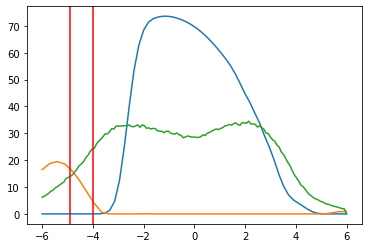

In [5]:
import matplotlib.pyplot as plt
from numpy import linspace

output = output.detach().numpy().flatten()
print(len(output))

len1 = linspace(-6, 6, len(dataset[1][0]))
len2 = linspace(-6, 6, len(output))
len3 = linspace(-6, 6, len(dataset[1][1]))

plt.plot(len1, dp.numpy().flatten())
plt.plot(len2, output)
plt.plot(len3, dataset[1][1])
plt.axvline(x=-4.9, color='red')
plt.axvline(x=-4., color='red')
plt.show()

In [6]:
eta, data = trim( dataset.final_eta, output, -4.9, -4.0 )

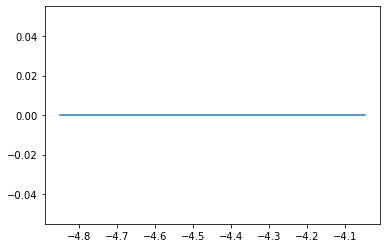

In [7]:
plt.plot(eta, data)
plt.show()